In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Load the dataset
df = pd.read_csv('train1.csv')
pd.set_option('display.max_colwidth',-1)
df.head()

<ipython-input-32-38855e919ff3>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


,ID,Sentence1,Sentence2,Class
0,0,"But instead of returning to heaven , Annie decided to join Chris in hell forever .","But instead of returning to Heaven , Chris chooses to join Annie forever in Hell .",0
1,1,"In 2016 , Bacardi announced new branding and plans to sell their version of Havana Club nationally , which will be burned in Florida and bottled in Puerto Rico .","In 2016 , Bacardi announced new branding and plans to sell their version of Havana Club nationally , which will be distilled in Puerto Rico and bottled in Florida .",0
2,2,"Kweku Baako Jnr had four children . One of them , Baako is a journalist and editor of the `` New Crusading Guide '' newspaper .","Baako had four children , one of whom was Kweku Baako Jnr , a journalist and editor of the newspaper `` New Crusading Guide '' .",0
3,3,"As with the Navy , the Army has a single-track system , where officers from other Navy communities transfer over to Foreign Area Officer permanently .","Like the army , the Navy has a single-track system , where officers from other Navy communities permanently transfer to Foreign Area Officer .",0
4,4,Sissi units have fewer crew served weapons and more sniper rifles than regular infantry .,Sissi units have more weapons served by the crew and fewer sniper rifles than regular infantry .,0


In [ ]:
df.tail()

,ID,Sentence1,Sentence2,Class
6996,6996,The 1912 - 13 season was Manchester United 's sixth season in the Football League and 21st in the First Division .,The season 1912 -- 13 was the 21st season of Manchester United in the Football League and the sixth in the First Division .,0
6997,6997,"Aaron Levie was born to a small family from Mercer Island , a Jewish suburb of Seattle , Washington , DC .","Aaron Levie was born to a small family from Mercer Island , a Jewish suburb of Seattle , Washington .",1
6998,6998,Wal-Mart said it would check all of its million-plus domestic workers to ensure they were legally employed.,It has also said it would review all of its domestic employees more than 1 million to ensure they have legal status.\n,1
6999,6999,She moved from Finland to Estonia with her parents at the age of 3 and currently resides in Helsinki .,She moved to Estonia from Finland with her parents at the age of 3 years and is currently living in Helsinki .,1
7000,7000,"The paper reports on business , politics , developments in corporate and labour law , commercial news and features .","The newspaper reports on business , politics , developments in corporate and labour law , commercial news and features .",1


In [ ]:
df.shape

(7001, 4)

In [ ]:
# Preprocess the text data
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
df['Sentence1'] = df['Sentence1'].apply(lambda x: ' '.join([stemmer.stem(word.lower()) for word in x.split() if word.lower() not in stop_words]))
df['Sentence2'] = df['Sentence2'].apply(lambda x: ' '.join([stemmer.stem(word.lower()) for word in x.split() if word.lower() not in stop_words]))

#Long-Short Term Memory(LSTM) Model


In [ ]:
# Split the dataset into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

In [ ]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['Sentence1'])

X_train = tokenizer.texts_to_sequences(train_data['Sentence1'])
X_train = pad_sequences(X_train, maxlen=100)

X_test = tokenizer.texts_to_sequences(test_data['Sentence1'])
X_test = pad_sequences(X_test, maxlen=100)

In [ ]:
# Define the LSTM model architecture
model = Sequential()
model.add(Embedding(5000, 128, input_length=100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, train_data['Class'], batch_size=64, epochs=10, validation_data=(X_test, test_data['Class']))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, test_data['Class'])

Epoch 1/10
88/88 [==============================] - 30s 314ms/step - loss: 0.6890 - accuracy: 0.5520 - val_loss: 0.6848 - val_accuracy: 0.5632
Epoch 2/10
88/88 [==============================] - 27s 306ms/step - loss: 0.6377 - accuracy: 0.6405 - val_loss: 0.7174 - val_accuracy: 0.5432
Epoch 3/10
88/88 [==============================] - 27s 309ms/step - loss: 0.4934 - accuracy: 0.7691 - val_loss: 0.8325 - val_accuracy: 0.5289
Epoch 4/10
88/88 [==============================] - 26s 300ms/step - loss: 0.3703 - accuracy: 0.8357 - val_loss: 0.9974 - val_accuracy: 0.5225
Epoch 5/10
88/88 [==============================] - 27s 308ms/step - loss: 0.2794 - accuracy: 0.8786 - val_loss: 1.1598 - val_accuracy: 0.5346
Epoch 6/10
88/88 [==============================] - 27s 304ms/step - loss: 0.2243 - accuracy: 0.9107 - val_loss: 1.2946 - val_accuracy: 0.5268
Epoch 7/10
88/88 [==============================] - 26s 296ms/step - loss: 0.1821 - accuracy: 0.9307 - val_loss: 1.5267 - val_accuracy: 0.5218

###Example:When there is paraphrase detection

In [ ]:
new_text = ["A barometer and a built-in scale are shown in this room .", "In this room are presented a barometer and a built-in scale ."]
new_text = tokenizer.texts_to_sequences(new_text)
new_text = pad_sequences(new_text, maxlen=100)
prediction = model.predict(new_text)
print(prediction)

1/1 [==============================] - 0s 34ms/step
[[0.9997638 ]
 [0.04912408]]


###Example2: When there is no paraphrase detection

In [ ]:
new_text = ["How do I file for bankruptcy?", "Can you file for bankruptcy twice?"]
new_text = tokenizer.texts_to_sequences(new_text)
new_text = pad_sequences(new_text, maxlen=100)
prediction = model.predict(new_text)
print(prediction)

1/1 [==============================] - 0s 422ms/step
[[0.20021057]
 [0.08208778]]


#Logistic Regression(LR) Model

In [2]:
data = pd.read_csv('train1.csv')

In [4]:
# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data['Sentence1'].astype(str) + ' ' + data['Sentence2'].astype(str), 
                                                                    data['Class'], 
                                                                    test_size=0.2, 
                                                                    random_state=42)

In [5]:
# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

In [6]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(train_vectors, train_labels)

LogisticRegression(max_iter=1000)

In [7]:

# Make predictions on test data
pred_labels = model.predict(test_vectors)

In [8]:

# Evaluate model accuracy
accuracy = accuracy_score(test_labels, pred_labels)
print("Model accuracy:", accuracy)

Model accuracy: 0.5289079229122056


#Naive Bayes Model

In [12]:

# Split the dataset into training and testing sets
train_set = data.sample(frac=0.8, random_state=42)
test_set = data.drop(train_set.index)

In [13]:

# Create a CountVectorizer object to convert text into numerical vectors
vectorizer = CountVectorizer()

In [14]:

# Convert the training and testing sets into numerical vectors
X_train = vectorizer.fit_transform(train_set["Sentence1"])
X_test = vectorizer.transform(test_set["Sentence1"])
y_train = train_set["Class"]
y_test = test_set["Class"]


In [15]:

# Train the Naive Bayes classifier on the training set
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Test the classifier on the testing set
y_pred = clf.predict(X_test)


In [16]:

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5435714285714286


##Comparision:


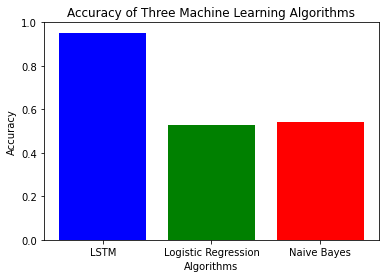

In [18]:
# Data for the bar graph
algorithms = ['LSTM', 'Logistic Regression', 'Naive Bayes']
accuracy = [0.95, 0.53, 0.54]  # Accuracy scores for each algorithm

# Plotting the bar graph
fig, ax = plt.subplots()
ax.bar(algorithms, accuracy, color=['b', 'g', 'r'])
ax.set_ylim([0, 1])  # Setting the y-axis limit to be between 0 and 1
ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Three Machine Learning Algorithms')

# Displaying the graph
plt.show()
